In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

cm = 1/2.54  # centimeters in inches

def format_axis(ax):
    ax.set_aspect(1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

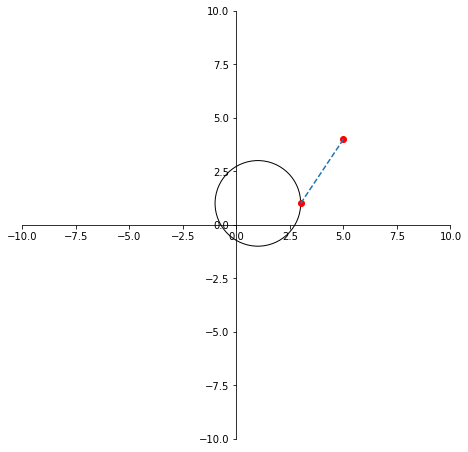

In [2]:

fig, ax = plt.subplots()
fig.set_size_inches(20*cm ,20*cm)
a=3+5j
b=1+4j
ax.plot((a.real,a.imag),(b.real,b.imag),'ro', linestyle='')

ax.axis([-10,10,-10,10])
format_axis(ax)

circle=mpl.patches.Circle((1,1),2, fill=False)
ax.add_patch(circle)

ax.plot((a.real,a.imag),(b.real,b.imag),'--')

plt.show()

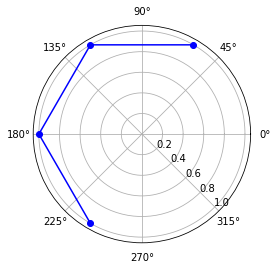

In [3]:
theta=np.pi/3
z_1=np.cos(theta)+np.sin(theta)*1j
max_power=4
powers=[z_1**n for n in range(1,max_power+1)]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.set_rmax(0.5)
# ax.set_rticks([0.2,0.5,1])  # Less radial ticks
ax.set_rlabel_position(-45.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.plot(np.angle(powers),np.abs(powers),'bo', linestyle='-')
plt.show()


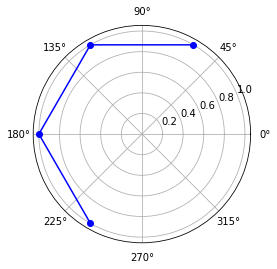

In [4]:
plt.polar(np.angle(powers),np.abs(powers),'bo', linestyle='-')

## Forma esponenziale

TypeError: annotate() missing 1 required positional argument: 's'

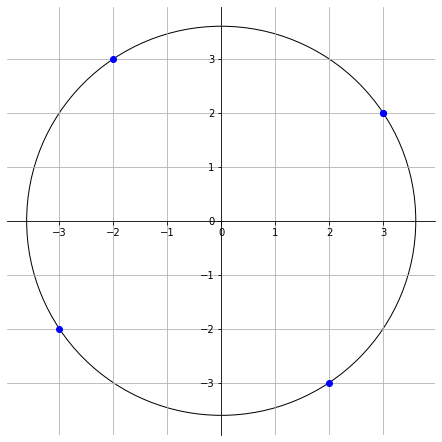

In [5]:
r=1
theta=np.pi/2
w=r*np.exp(theta*1j)
z=3+2j
max_power=4
powers=[z*(w**n) for n in range(0,max_power+1)]
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots()
fig.set_size_inches(20*cm ,20*cm)
ax.grid(True)
plt.plot([z.real for z in powers],[z.imag for z in powers],'bo', linestyle='')
circle=mpl.patches.Circle((0,0),np.abs(z), fill=False)
ax.add_patch(circle)
format_axis(ax)
ax.annotate(text='z',xy=[z.real+0.2,z.imag+0.2])
xrange=list(range(-3,4))
xrange.remove(0)
ax.set_xticks(xrange)
plt.show()

In [ ]:
verts = [
   (0., 0.),  # left, bottom
   (0.5, 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts,codes)
fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)
plt.show()

In [ ]:
data = [1+2j, 5+4j, -1+3j, -4+1j]
center_of_rotation=-4+1j
data.append(data[-1])
npdata=np.array(data) 
w=3*np.exp(-1j*np.pi/3)
tnpdata=w*(npdata-center_of_rotation)+center_of_rotation
# extract real part
x = [ele.real for ele in data]
# extract imaginary part
y = [ele.imag for ele in data]
verts=[(x1,y1) for (x1,y1) in zip(x,y)]
codes=[Path.LINETO for n in range(2,len(verts))]
codes.insert(0,Path.MOVETO)
codes.append(Path.CLOSEPOLY)
path = Path(verts,codes)
x = [ele.real for ele in tnpdata]
# extract imaginary part
y = [ele.imag for ele in tnpdata]
tverts=[(x1,y1) for (x1,y1) in zip(x,y)]

path2= Path(tverts,codes)
fig, ax = plt.subplots()
fig.set_size_inches(30*cm ,30*cm)
#format_axis(ax)
patch = patches.PathPatch(path, facecolor='none', lw=2)
tpatch=patches.PathPatch(path2, facecolor='none', lw=2,edgecolor="red")
ax.add_patch(patch)
ax.add_patch(tpatch)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True)
plt.show()


## Trasformazione spazio-> rotazioni


In [6]:
def draw_plot(transform,in_point, xmin=-15,xmax=15,ymin=-5,ymax=15,minrange=-10,maxrange=10):


    transform=transform
    in_point=in_point
    out_point=in_point * transform
    
    xmin=xmin #max(xmin,out_point.real-1)
    xmax=xmax #min(xmax,out_point.real+1)
    ymin=ymin #min(ymin,out_point.imag-1)
    ymax=ymax #max(ymax,out_point.imag+1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(30*cm ,30*cm)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(xmin, xmax, 1))
    ax.set_yticks(np.arange(ymin, ymax, 1))

    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, ls='--')
    
    min_range=min(minrange,xmin,ymin)
    
    max_range=max(maxrange,xmax,ymax)
    #max_range=int(2*np.abs(transform*xmax))

    x_axis=np.arange(min_range,max_range,1)
    y_axis=np.arange(min_range,max_range,1)*1j

    #Transform by transform

    x_axis_trans=transform * x_axis
    y_axis_trans = transform * y_axis
    

    marker_size=4

    for n in range(min_range,max_range):
        ax.plot((x_axis_trans+1j*transform*n).real,(x_axis_trans+1j*transform*n).imag,'o', ls='--',markersize=marker_size, color='gray')
        ax.plot((y_axis_trans+n*transform).real,(y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray')
        

    ax.plot(in_point.real,in_point.imag,'ro',markersize=8)
    ax.plot(out_point.real,out_point.imag,'bo',markersize=8)
    ax.plot(transform.real,transform.imag,'go',markersize=8)
    ax.plot(-transform.imag,transform.real,'go',markersize=8)
    ax.annotate('z',xy=[transform.real,transform.imag],xytext=[10,0],fontsize=16,textcoords='offset points',color='green')
    ax.annotate('jz',xy=[(1j*transform).real,(1j*transform).imag],xytext=[10,0],fontsize=16,textcoords='offset points',color='green')
    ax.annotate('w',xy=[(in_point).real,(in_point).imag],xytext=[10,0],fontsize=14,textcoords='offset points',color='red')
    ax.annotate('wz',xy=[(out_point).real,(out_point).imag],xytext=[10,0],fontsize=14,textcoords='offset points',color='blue')


    plt.show()

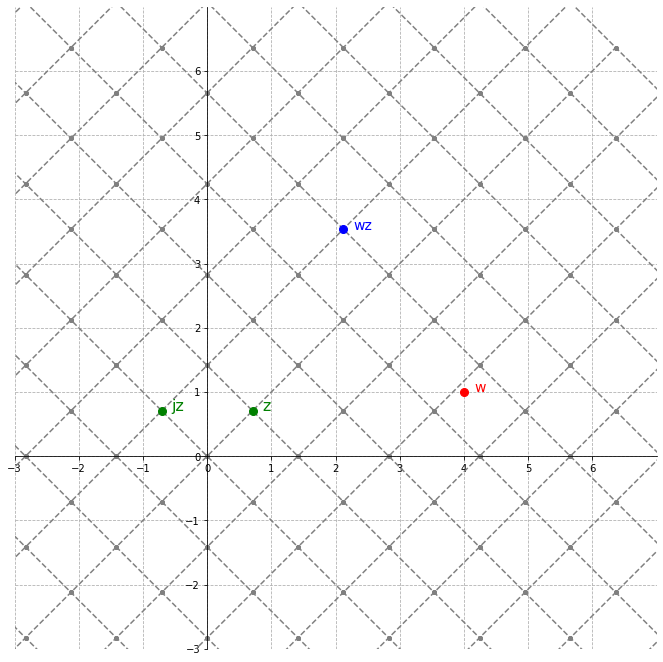

In [7]:
draw_plot(transform=np.exp(1j*np.pi/4),in_point=4+1j,ymin=-3,ymax=7,xmin=-3,xmax=7)#,maxrange=50,minrange=-50)
